In [1]:
from collections import Counter
from linear_algebra import distance
from stats import mean
import math, random
import matplotlib.pyplot as plt

# find most frequent one >> nearest K
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

In [2]:
raw_majority_vote([1,1,1,1,1,2,2,2,2,2])
# 값이 같은 항목들을 제대로 처리하지 못한다.
# 이럴 땐 다음과 같은 선택을 할 수 있다.
# - 여러 1등 중 임의로 하나를 정한다.
# - 거리를 가중치로 사용해서 거리 기반 투표를 한다.
# - 단독 1등이 생길 때까지 k를 하나씩 줄인다. >> 구현

1

In [3]:
def majorityVote(labels):
    voteCounts = Counter(labels)
    winner, winnerCount = voteCounts.most_common(1)[0]
    num_winners = len([count for count in voteCounts.values()
                       if count is winnerCount])
    if num_winners is 1:
        return winner
    else:
        return majorityVote(labels[:-1])

In [4]:
majorityVote([5,5,5,5,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4])

5

## 예시 : 가장 인기 있는 프로그래밍 언어

각 대도시 사람들이 선호하는 프로그래밍 언어의 데이터가 있다고 쳐보자.

In [5]:
# 데이터는 [경도, 위도], 선호하는 프로그래밍 언어 꼴로 이루어져있다.
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

def knnClassify(k, labeledPoints, newPoint):
    """labeldPoints는 데이터 포인트, 레이블 쌍으로 구성됨."""
    
    """labeldPoints를 가까운 순서부터 먼 순서로 정렬"""
    byDistance = sorted(labeledPoints,
                        key=lambda pointLabel: distance(pointLabel[0], newPoint))
                        
    kNearest = [label for _, label in byDistance[:k]]
                        
    return majorityVote(kNearest)
    

In [6]:
def testkNN(klist):
    for k in klist:
        numCorrect = 0
        
        for location, actualLanguage in cities:
            otherCities = [otherCity 
                           for otherCity in cities
                           if otherCity != (location, actualLanguage)]
            
            predictedLanguage = knnClassify(k, otherCities, location)
            
            if predictedLanguage == actualLanguage:
                numCorrect += 1
                
        print(k, "neighbors[s]:", numCorrect, "correct out of", len(cities))
    
testkNN([1,3,5,7])
# k 값을 3으로 정했을 때의 정확도가 가장 높다.
# 3의 주변 수에 대해서 다음과 같은 시도도 해볼 수 있다.

1 neighbors[s]: 40 correct out of 75
3 neighbors[s]: 44 correct out of 75
5 neighbors[s]: 41 correct out of 75
7 neighbors[s]: 35 correct out of 75


In [7]:
testkNN([2,4])
print(44/75)
# k=4일 때에도 약 59%의 정확도를 지닌다.

2 neighbors[s]: 40 correct out of 75
4 neighbors[s]: 44 correct out of 75
0.5866666666666667


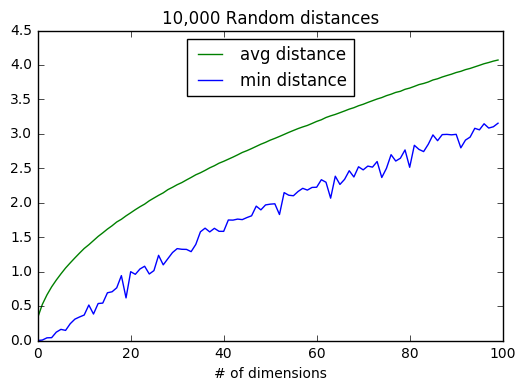

In [27]:
# 무작위 지점(차원)
def randomPoint(dim):
    return [random.random() for _ in range(dim)]

# 무작위 지점과 지점간의 거리(차원, 쌍)
def randomDistances(dim, numPairs):
    return [distance(randomPoint(dim), randomPoint(dim)) for _ in range(numPairs)]

dimensions = range(1, 101)

avgDistances = []
minDistances = []
random.seed(0)

for dim in dimensions:
    distances = randomDistances(dim, 10000)
    avgDistances.append(mean(distances))
    minDistances.append(min(distances))

plt.plot(avgDistances, color='green', linestyle='solid', label='avg distance')
plt.plot(minDistances, color='blue', linestyle='solid', label='min distance')
plt.title("10,000 Random distances")
plt.xlabel("# of dimensions")
plt.legend(loc=9)
plt.show()

차원이 증가할수록 점들 간 평균 거리도 증가하지만,
더 큰 문제는 최근접거리와 평균 거리의 비율이다.

In [11]:
minAvgRatio = [minDist / avgDist
               for minDist, avgDist in zip(minDistances, avgDistances)]

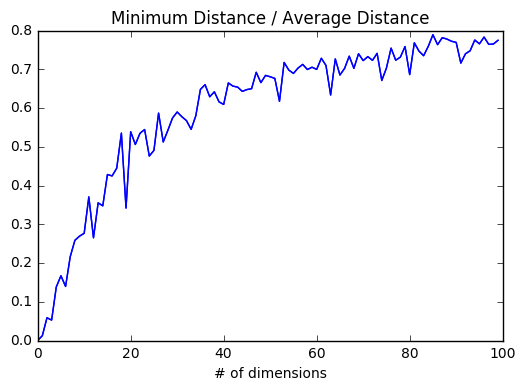

In [23]:
plt.plot(minAvgRatio, color='blue', linestyle='solid')
plt.title("Minimum Distance / Average Distance")
plt.xlabel("# of dimensions")
plt.show()

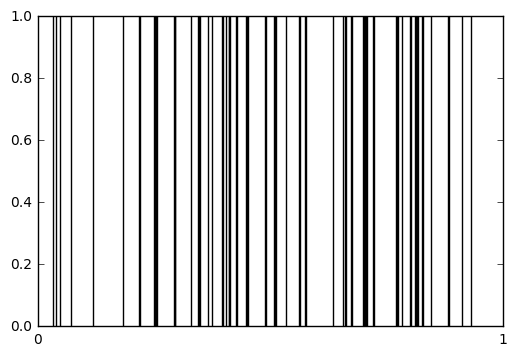

In [71]:
x=randomPoint(50)
y=[]
for _ in range(50):
    y.append(1)

plt.bar(x,y,0.001)
plt.xticks([i for i in range(100)])
plt.axis([0, 1, 0, 1])
plt.show()